##  LOF 이상 탐지(거리, 밀도기반 이상탐지)
___
* 정의
```
# Density-based Methods LOF(Local Outlier Factor) 
# 대부분의 이상탐지 알고리즘은 Global(전역) 관점에서 개별의 관측치가 이상인지 판별함 (O2는 아웃라이어 아님)
# 위의 단점을 극복하기 위해, Local(국소적) 정보를 이용하여 이상인지를 판별함 (O2는 아웃라이어임)
# LOF는 관측치가 데이터 안에서 얼마나 벗어나 있는가에 대한 정도를 나타냄
# 'K' Hyper parameter를 통해 주변 데이터를 몇 개까지 고려할지를 결정, LOF 값을 threshold로 설정해서 아웃라이어를 결정
# LOF < 1 : 밀도가 높은 분포
# LOF = 1 : 이웃 관측치와 비슷한 분포
# LOF > 1 : 밀도가 낮은분포, 크면 클수록 이상치 정도가 큼
```
<img src = "https://drive.google.com/uc?id=1Oa2Han1oF7NILaq26sMTd4nf0bg9QioF">
<img src = "https://drive.google.com/uc?id=1f1ccNCWYhaNa75GnG2Nu3PSkGokpUfmA">


* 장단점
```
  # [good] 굉장히 밀집한 클러스터에서 조금만 떨어져 있어도 이상치로 탐지
  # [good] KNN과 다르게 특별한 라벨링이 없어도 사용할 수 있음(Unsupervised Learning), 고장의 전조증상은 고장이라고 라벨링 되지 않음.
  # [good] Local Outlier를 탐지할 수 있음
  # [good] 데이터에 대한 가정이 필요 없음(데이터 분포에 대한 가정)
  # [bad] 데이터의 차원수가 증가할 수록 계산량이 많음
  # [bad] 이상치 판단 기준 설정 어려움 (※ 밀집도가 다른 여러 클러스터가 존재한다면 민감하게 반응함)
```
  
* 사용방법
```
# sklearn.neighbors 패키지 활용
# n_neighbors 결정 (※ 이외에 다양한 Hyper parameter 결정)
# 표준화(Min-Max nomalization or z-score standardization)
# 새로운 Data에 대해 지속 수행
```

* 현업사례
```
# 공정(설비) 데이터 이상탐지
# 공정 센서 데이터 실시간 이상탐지
```


### 실습
___

In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# ▶ Toy data 생성 (3차원 데이터), 데이터를 수정하면서 LOF를 이해해 보세요. 
df_train = pd.DataFrame([
        [2, 1, 3],
        [2, 1, 3],
        [2, 1, 3],
        [3, 2, 5],
        [3, 4, 7],
        [5, 5, 10],
        [7, 5, 12],
        [2, 5, 7],
        [8, 9, 13],
        [9, 10, 13],
        [10, 50, 12], # ▶ 이상값 추가
        [11, 45, 13], # ▶ 이상값 추가
        [12, 50, 15], 
        [13, 47, 14], 
        [6, 12, 12]
    ], columns=['hour', 'attendance', 'score'])

df_test = pd.DataFrame([
        [9, 2, 13],
        [6, 10, 12],
        [2, 4, 6]
    ], columns=['hour', 'attendance', 'score'])

In [24]:
# ▶ 데이터 확인
df_train

,hour,attendance,score
0,2,1,3
1,2,1,3
2,2,1,3
3,3,2,5
4,3,4,7
5,5,5,10
6,7,5,12
7,2,5,7
8,8,9,13
9,9,10,13


In [29]:
# ▶ 모델 생성 및 예측, n_neighbors, contamination을 변경해보세요. 제일 먼저는 default 값으로 설정해보고 상황에 맞춰 변경해보기 바랍니다.
outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.01)
y_predict = outlier.fit_predict(df_train)
df_train['outlier'] = y_predict
df_train

,hour,attendance,score,outlier,LOF
0,2,1,3,1,-0.992962
1,2,1,3,1,-0.992962
2,2,1,3,1,-0.992962
3,3,2,5,1,-0.995530
4,3,4,7,1,-0.999269
5,5,5,10,1,-1.002090
6,7,5,12,1,-1.002803
7,2,5,7,1,-1.000510
8,8,9,13,1,-1.009523
9,9,10,13,1,-1.011280


In [30]:
y_predict

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1])

In [31]:
# ▶ LOF 값 확인
# ▶ negative_outlier_factor_ : The opposite LOF of the training samples. LOF 값이 음수로 나옴.
outlier.negative_outlier_factor_
df_train["LOF"]= outlier.negative_outlier_factor_
df_train

,hour,attendance,score,outlier,LOF
0,2,1,3,1,-0.974400
1,2,1,3,1,-0.974400
2,2,1,3,1,-0.974400
3,3,2,5,1,-1.061541
4,3,4,7,1,-0.976211
5,5,5,10,1,-1.066162
6,7,5,12,1,-1.196848
7,2,5,7,1,-0.951798
8,8,9,13,1,-1.175923
9,9,10,13,1,-1.205353


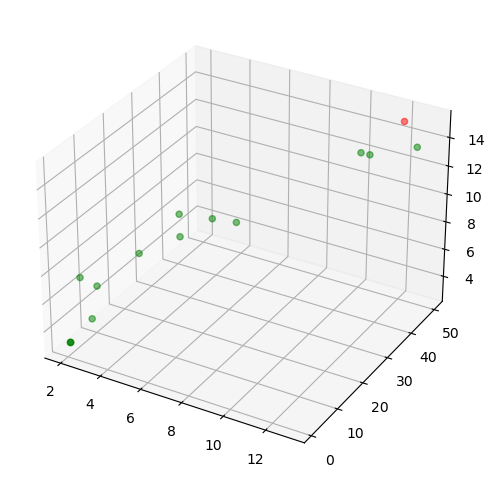

In [32]:
# ▶ 3D plot 및 확인
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

df_red = df_train[df_train['outlier']==-1]
df_green = df_train[df_train['outlier']==1]

ax.scatter(df_red['hour'], df_red['attendance'],df_red['score'], color = 'r', alpha = 0.5);
ax.scatter(df_green['hour'], df_green['attendance'],df_green['score'], color = 'g', alpha = 0.5);

In [33]:
# 글로벌, 로컬 관점에서 모두 LOF를 적용할 수 있다. 
# LOF 값을 이용하여 scoring 방법으로 outlier 탐지가 가능하다.
# 연산량이 많고, 클러스터가 많으면 잘 고려해야 한다.
# 실제 분석에서는 데이터 표준화가 필요하다. 
# n_neighbors, contamination  하이퍼 파라미터 조절 필요

##  Isolation Forest 이상 탐지(분류모델 기반 이상탐지)
___
* 먼저 Decision Tree부터 알고가자.
    - https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree
* 그리고 Random Forest
    - https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest%EC%99%80-%EC%95%99%EC%83%81%EB%B8%94Ensemble
* 정의
```
# Unsupervised Anomaly Deteciotn 중 하나의 기법
# 여러 개의 의사결정나무(decision tree)를 종합한 앙상블 기반의 이상탐지 기법
# 의사결정나무를 지속적으로 분기시키면서 모든 데이터 관측치의 고립 정도 여부에 따라 이상치를 판별하는 방법
# 비정상 데이터라면 의사결정나무 루트(root)에서 가까운 단계에서 고립(1~10 정도의 데이터인데, 100,000이란 데이터는 금방 고립될 것이다)
# 정상 데이터라면 루트(root)에서 먼 단계에서 고립
# 특정 관측치가 고립되는 Leaf 노드까지의 거리를 Outlier Score로 정의
# 루트(root) 노드까지의 평균 거리가 짧을 수록 Outlier Score가 높아짐
```
<img src = "https://drive.google.com/uc?id=1tcAaNi2mAcdxj__gM_uzJBN221xMhuAM" width="450" height="200">
<img src = "https://drive.google.com/uc?id=15fCn00JASUkSO0dj7hM1TgpqJGGMKIld" width="400" height="">

* 장단점
```
  # [good] 군집기반 이상탐지 알고리즘(KNN, LOF)에 비해 계산량이 매우 적음 (※ Sampling 사용해서 Tree 생성)
  # [good] Anomaly Detection 성능 우수 (※ Robust)
  # [good] Train data에 이상치가 포함되지 않아도 잘 동작함 
  # [bad] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음 (※ 대안책 Extended Isolation Forest)
      - 클러스터가 여러개인 데이터세트의 경우, 클러스터 중심에 있는데 아웃라이어 인데, 아니라고 하는 경우가 있음.
      - Extended Isolation Forest는 원형이나 다른 방법으로 고립시킴.
```
  
* 사용방법
```
# from sklearn.ensemble import IsolationForest
# 데이터 현황(분포 및 특성) 파악 (차원축소나 클러스터링을 통해)
# Hyper-paramter 결정(트리개수, 아웃라이어 관련)
# 학습 및 예측
# threshold 및 scoring (현업과 지속적으로 소통하면서 결정)
```

* 현업사례
```
# 로그 데이터 이상탐지
# 품질관리를 위한 이상탐지
```


### 실습
___

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
# ▶ Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# ▶ Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# ▶ Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

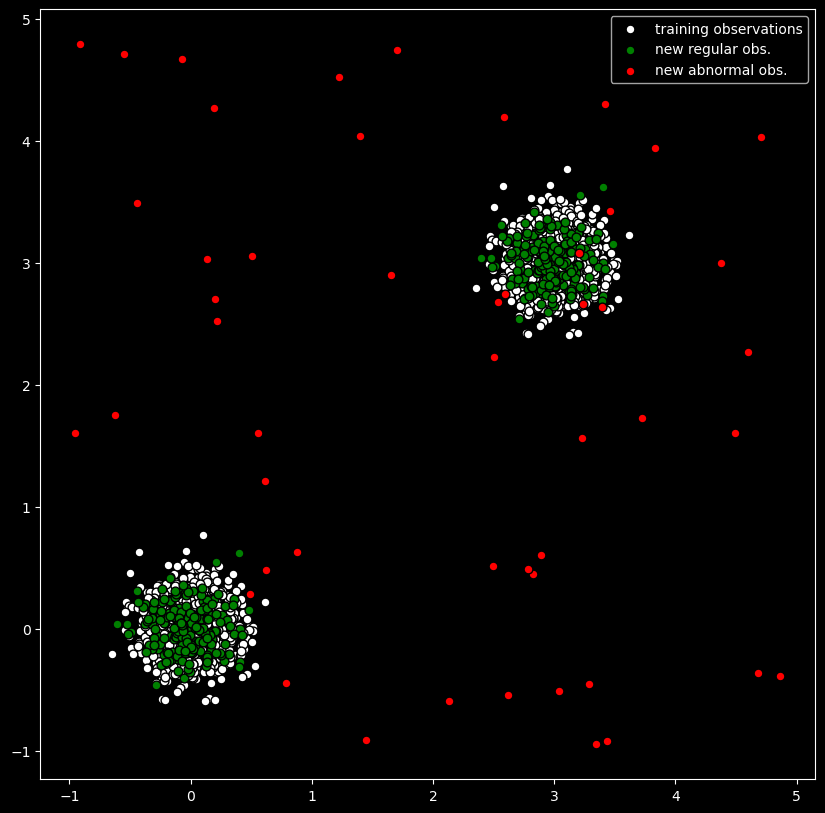

In [29]:
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = [10, 10]

# ▶ Train set
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*2, edgecolor='k', label='training observations')

# ▶ Test set, 정상 Sample로 구성
p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*2, edgecolor='k', label='new regular obs.')

# ▶ Outlier set
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*2, edgecolor='k', label='new abnormal obs.')

plt.legend()
# plt.gcf().set_size_inches(5, 5)

In [30]:
# ▶ Model 학습 및 예측
# - n_estimators : 나무의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=100, contamination = 0.05, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [31]:
# ▶ -1 : Outlier / 1 : Normal
y_pred_outliers

array([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1])

In [32]:
# ▶ Score, 낮을 수록 Outlier, 음수
clf.decision_function(X_outliers)

array([-0.07397915, -0.10344893, -0.06839828,  0.00754778, -0.02594477,
       -0.10344893, -0.03858639,  0.02753773, -0.06375707, -0.06988794,
       -0.09467105, -0.07814982, -0.08015771, -0.04450317,  0.12127897,
       -0.08251879, -0.0615171 , -0.0839109 , -0.08435337, -0.01324472,
       -0.09467105, -0.08594633, -0.09647411, -0.09101499, -0.0648407 ,
       -0.08185362, -0.0200524 , -0.03235862, -0.06813104, -0.07117076,
       -0.09423924, -0.02588178, -0.05521445, -0.08650631, -0.03681947,
       -0.04963059, -0.09951997, -0.09951997, -0.08342488, -0.03517144,
       -0.06276045, -0.08643544, -0.08145166, -0.05683871, -0.06592612,
       -0.00561074, -0.08398277, -0.03698318, -0.02039574,  0.00107149])

In [33]:
# ▶ Score, 높을 수록 Nomral(Inlier), 양수
clf.decision_function(X_test)[0:5]

array([0.13520326, 0.12503499, 0.04709557, 0.14023926, 0.11374595])

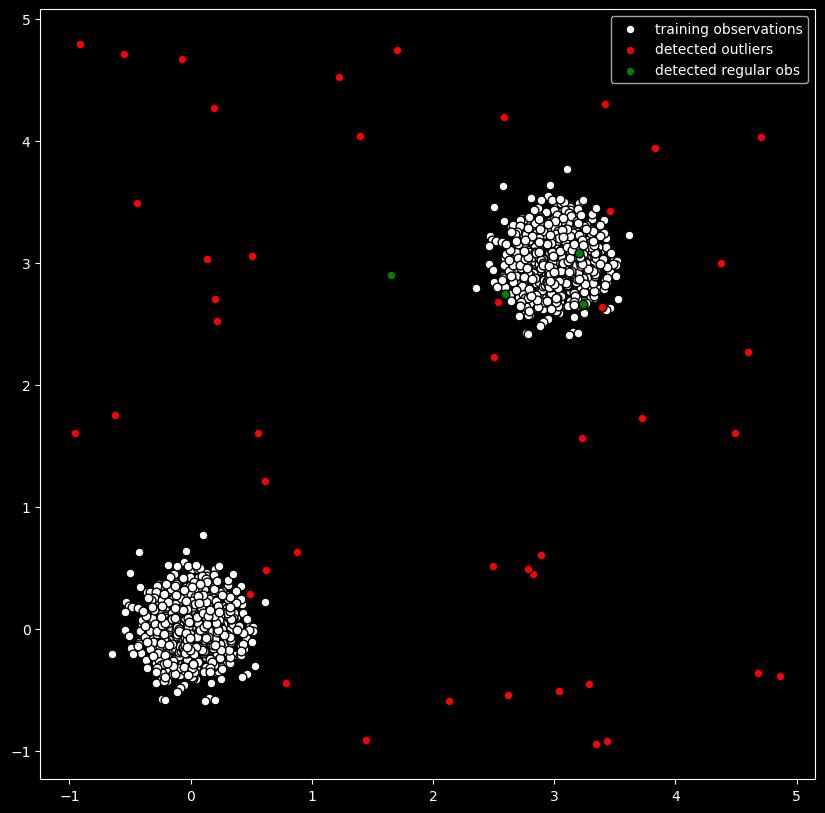

In [34]:
# ▶ Outlier Label 할당
X_outliers = X_outliers.assign(y = y_pred_outliers)

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*2, edgecolor='k', label="training observations")

p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label="detected outliers")

p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label="detected regular obs")
plt.legend()
plt.gcf().set_size_inches(10, 10)

In [35]:
# ▶ 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# ▶ Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.96
이상치 데이터셋에서 정확도: 0.92


In [ ]:
AutoEncoder로 이상탐지 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyod.utils.data import generate_data
X_train , X_test , y_train , y_test = generate_data(n_train=20000 ,
                                                    n_test=2000 ,
                                                    n_features= 300 ,
                                                    contamination=0.1,
                                                    random_state=0)

In [4]:
print(X_train.shape, y_train.shape)

(20000, 300) (20000,)


In [5]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
n_features = 300 #종류 300종류 
latent_dim = 100 #100차원

#인코더
enc_inputs = layers.Input(shape=(n_features,)) #sample 갯수 빼고  
x = layers.Dense(200 , activation = "relu" )(enc_inputs) #은닉계층엔 relu
enc_outputs = layers.Dense(latent_dim, activation="relu")(x) #Latent vector # 차원의 개수 

encoder = Model(inputs = enc_inputs , outputs= enc_outputs)

#디코더 
dec_inputs = layers.Input(shape=(latent_dim,))#Latent vector
x = layers.Dense(200 , activation = "relu" )(dec_inputs) 
dec_outputs = layers.Dense(n_features)(x) 

decoder = Model(inputs = dec_inputs , outputs= dec_outputs)

#오토인코더
inputs = layers.Input(shape=(n_features,))
latent = encoder(inputs)
outputs = decoder(latent)


AE = Model(inputs = inputs , outputs = outputs)
AE.compile(optimizer="adam",
           loss = "mse")
AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 model (Functional)          (None, 100)               80300     
                                                                 
 model_1 (Functional)        (None, 300)               80500     
                                                                 
Total params: 160,800
Trainable params: 160,800
Non-trainable params: 0
_________________________________________________________________


In [7]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense (Dense)               (None, 200)               60200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
Total params: 80,300
Trainable params: 80,300
Non-trainable params: 0
_________________________________________________________________


In [8]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 300)               60300     
                                                                 
Total params: 80,500
Trainable params: 80,500
Non-trainable params: 0
_________________________________________________________________


In [9]:
#학습 
AE.fit(X_train_sc, X_train_sc , validation_split=0.2 , batch_size = 128 , epochs = 20) #autoencoder 는 입력을 복원 , 출력도 같음 

Epoch 1/20
125/125 [==============================] - 1s 2ms/step - loss: 0.1920 - val_loss: 16.0061
Epoch 2/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1725 - val_loss: 15.2013
Epoch 3/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1664 - val_loss: 17.0707
Epoch 4/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1654 - val_loss: 18.3962
Epoch 5/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1637 - val_loss: 18.5818
Epoch 6/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1625 - val_loss: 19.4282
Epoch 7/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1621 - val_loss: 20.1990
Epoch 8/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1618 - val_loss: 20.6357
Epoch 9/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1615 - val_loss: 21.0827
Epoch 10/20
125/125 [==============================] - 0s 1ms/step - loss: 0.1612 - val_los

In [10]:
p_test = AE.predict(X_test_sc) # X_test 에 대해서 복원함. -> p _test로 지정
p_test.shape #== X_test 랑 똑같음  

63/63 [==============================] - 0s 514us/step


(2000, 300)

In [11]:
X_test.shape

(2000, 300)

In [12]:
# rce (reconstruction Error ) 재건 에러 , 복원오차 
def reconstruction_error(x, p):

    # return np.mean(np.abs(x - p))
    #x 랑 p 는 sample이 2000개있음. 2000 X 300개 의 싹다 평균내서 값 딱 1개나옴

    # 그래서 샘플별로 따로 해줘야함. 
    return np.mean(np.abs(x - p) , axis = 1)

rce = reconstruction_error(X_test_sc, p_test)

In [13]:
rce

array([0.34828634, 0.32436085, 0.31487801, ..., 6.44203129, 6.39292754,
       6.02524987])

In [14]:
rce.shape #2000개 나옴 

(2000,)

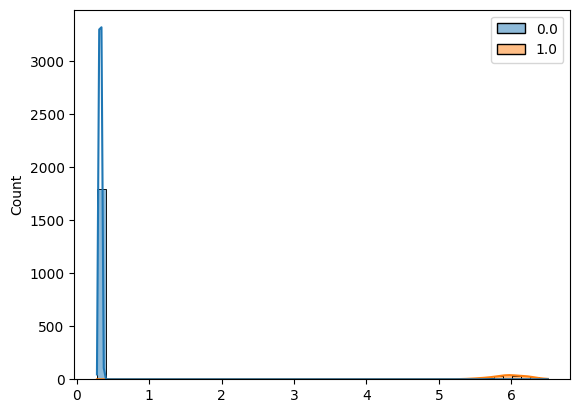

In [15]:

plt.figure()
sns.histplot(x=rce, hue=y_test ,bins =50, kde=True ) 
plt.show()


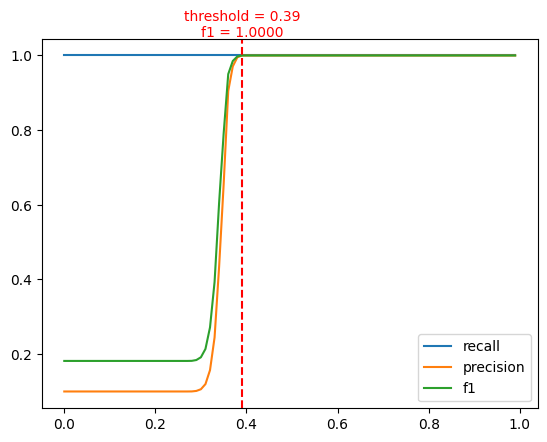

In [16]:
from sklearn.metrics import f1_score , recall_score , precision_score,roc_curve
recall = []
precision = []
f1 = []

thresholds = np.arange(0, 1, 0.01)
for thres in thresholds:
    results = rce > thres
    recall.append(recall_score(y_test, results))
    precision.append(precision_score(y_test, results))
    f1.append(f1_score(y_test, results))

plt.figure()
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, f1, label='f1')

plt.axvline(thresholds[np.argmax(f1)], color='red', linestyle='--')
plt.text(thresholds[np.argmax(f1)], 1.05, 'threshold = {}\nf1 = {:.4f}'.format(thresholds[np.argmax(f1)], np.max(f1)),
         color='red', horizontalalignment='center')

plt.legend()
plt.show()

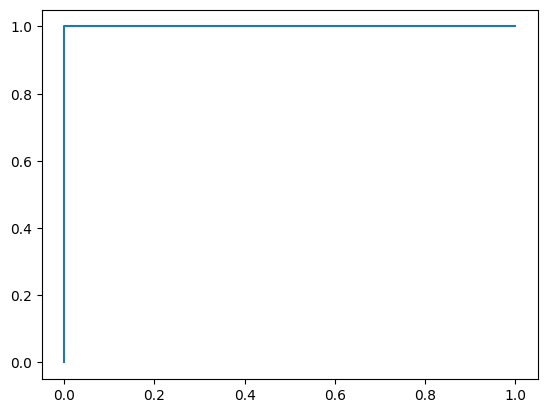

In [17]:
fpr , tpr, _ = roc_curve(y_test,rce)
plt.figure()
plt.plot(fpr,tpr)
plt.show()

In [ ]:
#실습

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyod.utils.data import generate_data
data = pd.read_csv("creditcard.csv") 
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [21]:
normal_data = data[data["Class"] == 0].drop(["Time", "Class"], axis=1)
anormal_data = data[data["Class"] == 1].drop(["Time", "Class"], axis=1)
normal_data.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


In [22]:
from sklearn.preprocessing import StandardScaler
X_train = normal_data.values[:283823]
X_normal_test = normal_data.values[283823:]
X_anormal_test = anormal_data.values

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_normal_test_std = sc.transform(X_normal_test)
X_anormal_test_std = sc.transform(X_anormal_test)

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model 
n_features = 29 
latent_dim = 10

#인코더
enc_inputs = layers.Input(shape=(n_features,)) #sample 갯수 빼고  
x = layers.Dense(200 , activation = "relu" )(enc_inputs) #은닉계층엔 relu
enc_outputs = layers.Dense(latent_dim, activation="relu")(x) #Latent vector # 차원의 개수 

encoder = Model(inputs = enc_inputs , outputs= enc_outputs)

#디코더 
dec_inputs = layers.Input(shape=(latent_dim,))#Latent vector
x = layers.Dense(200 , activation = "relu" )(dec_inputs) 
dec_outputs = layers.Dense(n_features)(x) 

decoder = Model(inputs = dec_inputs , outputs= dec_outputs)

#오토인코더
inputs = layers.Input(shape=(n_features,))
latent = encoder(inputs)
outputs = decoder(latent)


AE = Model(inputs = inputs , outputs = outputs)
AE.compile(optimizer="adam",
           loss = "mse")
AE.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 29)]              0         
                                                                 
 model_18 (Functional)       (None, 10)                8010      
                                                                 
 model_19 (Functional)       (None, 29)                8029      
                                                                 
Total params: 16,039
Trainable params: 16,039
Non-trainable params: 0
_________________________________________________________________


In [37]:
AE.fit(X_train_std, X_train_std , validation_split=0.2 , batch_size = 128 , epochs = 20)

Epoch 1/20
1774/1774 [==============================] - 3s 1ms/step - loss: 0.3203 - val_loss: 0.2462
Epoch 2/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.1753 - val_loss: 0.1708
Epoch 3/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.1410 - val_loss: 0.1452
Epoch 4/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.1237 - val_loss: 0.1272
Epoch 5/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.1117 - val_loss: 0.1190
Epoch 6/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.1028 - val_loss: 0.1100
Epoch 7/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.0971 - val_loss: 0.1027
Epoch 8/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.0921 - val_loss: 0.0998
Epoch 9/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.0880 - val_loss: 0.0956
Epoch 10/20
1774/1774 [==============================] - 2s 1ms/step - loss: 0.085

In [38]:
def reconstruction_error(x, p): 
    return np.mean(np.abs(x - p) , axis = 1)
    
p_normal = AE.predict(X_normal_test_std)
p_anormal = AE.predict(X_anormal_test_std) 



re_normal = reconstruction_error(X_normal_test_std, p_normal) 
re_anormal = reconstruction_error(X_anormal_test_std, p_anormal) 

re_all = np.concatenate([re_normal, re_anormal])
label_all = np.concatenate([np.zeros_like(re_normal),
                            np.ones_like(re_anormal)]) 


16/16 [==============================] - 0s 2ms/step


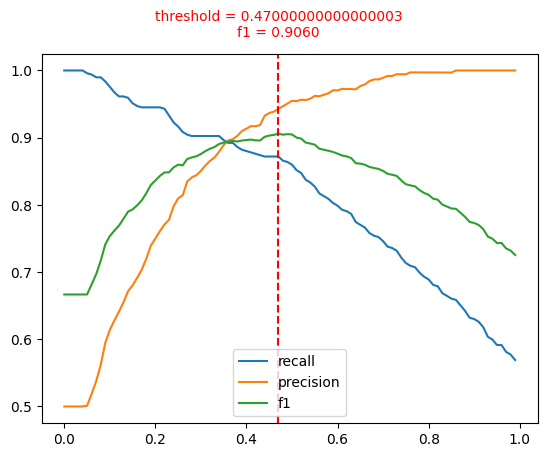

In [39]:
from sklearn.metrics import f1_score , recall_score , precision_score,roc_curve
recall = []
precision = []
f1 = []

thresholds = np.arange(0, 1, 0.01)
for thres in thresholds:
    results = re_all > thres
    recall.append(recall_score(label_all, results))
    precision.append(precision_score(label_all, results))
    f1.append(f1_score(label_all, results))

plt.figure()
plt.plot(thresholds, recall, label='recall')
plt.plot(thresholds, precision, label='precision')
plt.plot(thresholds, f1, label='f1')

plt.axvline(thresholds[np.argmax(f1)], color='red', linestyle='--')
plt.text(thresholds[np.argmax(f1)], 1.05, 'threshold = {}\nf1 = {:.4f}'.format(thresholds[np.argmax(f1)], np.max(f1)),
         color='red', horizontalalignment='center')

plt.legend()
plt.show()

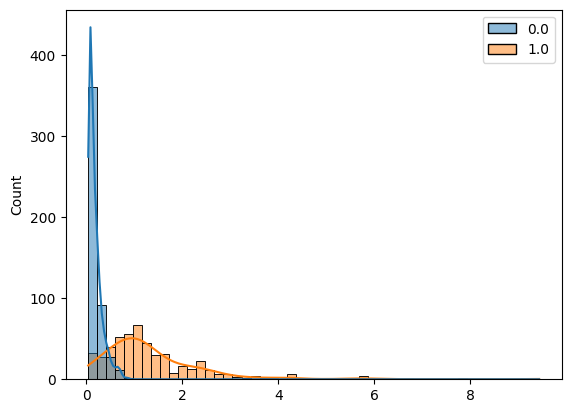

In [40]:
plt.figure()
sns.histplot(x=re_all , bins=50, hue=label_all , kde=True)
plt.show()

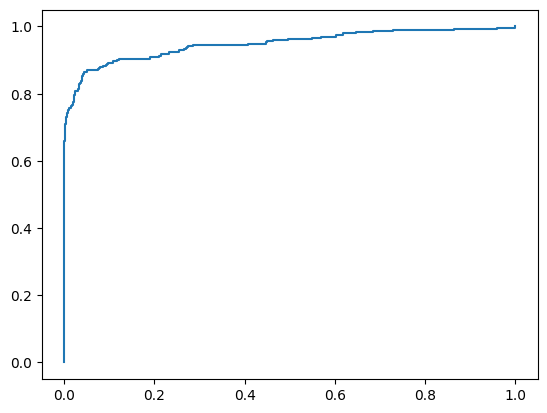

In [42]:
fpr , tpr, _ = roc_curve(label_all,re_all)
plt.figure()
plt.plot(fpr,tpr)
plt.show()